In [1]:
# https://www.youtube.com/watch?v=aLyEQQ6_-gQ&list=PL_tQOEJCWOE5aTQDXRm3Y3LY_s4gu2ALb&index=2
# https://analysis-navi.com/?p=3868#google_vignette

from datetime import datetime

test_date = datetime(2020,11,20,12,34,56)
test_date2 = datetime(2020,11,21,14,4,5)

In [2]:
from dateutil.relativedelta import relativedelta

# 時系列の計算ができる
display(test_date + relativedelta(days=1))

datetime.datetime(2020, 11, 21, 12, 34, 56)

In [3]:
# 曜日がわかる
display(test_date2.strftime("%A"))

'Saturday'

In [4]:
import pandas as pd
# parse_dates=True: index_colが時系列データとして認識される
df = pd.read_csv("3-1_TS_sample.csv", index_col="年月日", encoding="shift_jis", parse_dates=True)
display(df)

,平均気温(℃),降水量の合計(mm),日照時間(時間)
年月日,,,
2018-01-01,6.2,0.0,8.4
2018-01-02,6.1,0.0,8.9
2018-01-03,4.9,0.0,8.9
2018-01-04,4.7,0.0,8.8
2018-01-05,3.7,0.0,0.1
...,...,...,...
2019-12-27,8.7,0.5,6.5
2019-12-28,6.8,0.0,8.8
2019-12-29,7.0,0.0,8.3


In [5]:
# インデックス名を英語にリネーム
df = df.rename_axis('Date', axis=0)

# 列名を英語にリネーム
new_columns = {
    '平均気温(℃)': 'Average Temperature (℃)',
    '降水量の合計(mm)': 'Total Precipitation (mm)',
    '日照時間(時間)': 'Sunshine Duration (hours)'
}

df.rename(columns=new_columns, inplace=True)

In [6]:
# resample: 時系列版groupby

# 集計だけであれば, resampleかstrftime("%A")で可能

# 年ごとに集計
df.resample("Y").mean() #max()...

# 月ごとに集計
df.resample("M").mean() #max()...

# 週ごとに集計
df.resample("W").mean() #max()...

# 2ヶ月ごとに集計
df.resample("2M").mean() #max()...

,Average Temperature (℃),Total Precipitation (mm),Sunshine Duration (hours)
Date,,,
2018-01-31,4.654839,1.564516,6.648387
2018-03-31,8.562712,4.067797,6.191525
2018-05-31,18.429508,4.500000,6.575410
2018-07-31,25.363934,4.303279,6.398361
2018-09-30,25.501639,7.401639,5.149180
2018-11-30,16.585246,2.040984,4.754098
2019-01-31,6.964516,0.967742,5.927419
2019-03-31,8.961017,2.703390,5.344068
2019-05-31,16.868852,3.459016,6.947541


In [7]:
# 曜日ごとにresampleしたい場合
df["Day of the Week"] = df.index.strftime("%A")
display(df.groupby("Day of the Week").mean())

,Average Temperature (℃),Total Precipitation (mm),Sunshine Duration (hours)
Day of the Week,,,
Friday,16.506731,4.206731,5.727885
Monday,16.749524,6.576190,5.161905
Saturday,16.434615,5.230769,5.896154
Sunday,16.742308,3.625000,5.875000
Thursday,16.878846,3.745192,5.119231
Tuesday,16.649524,3.971429,5.478095
Wednesday,16.708654,4.461538,5.304808


In [8]:
# 時系列は折れ線グラフが基本
# pip install japanize-matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
# import japanize_matplotlib

<Axes: xlabel='Date'>

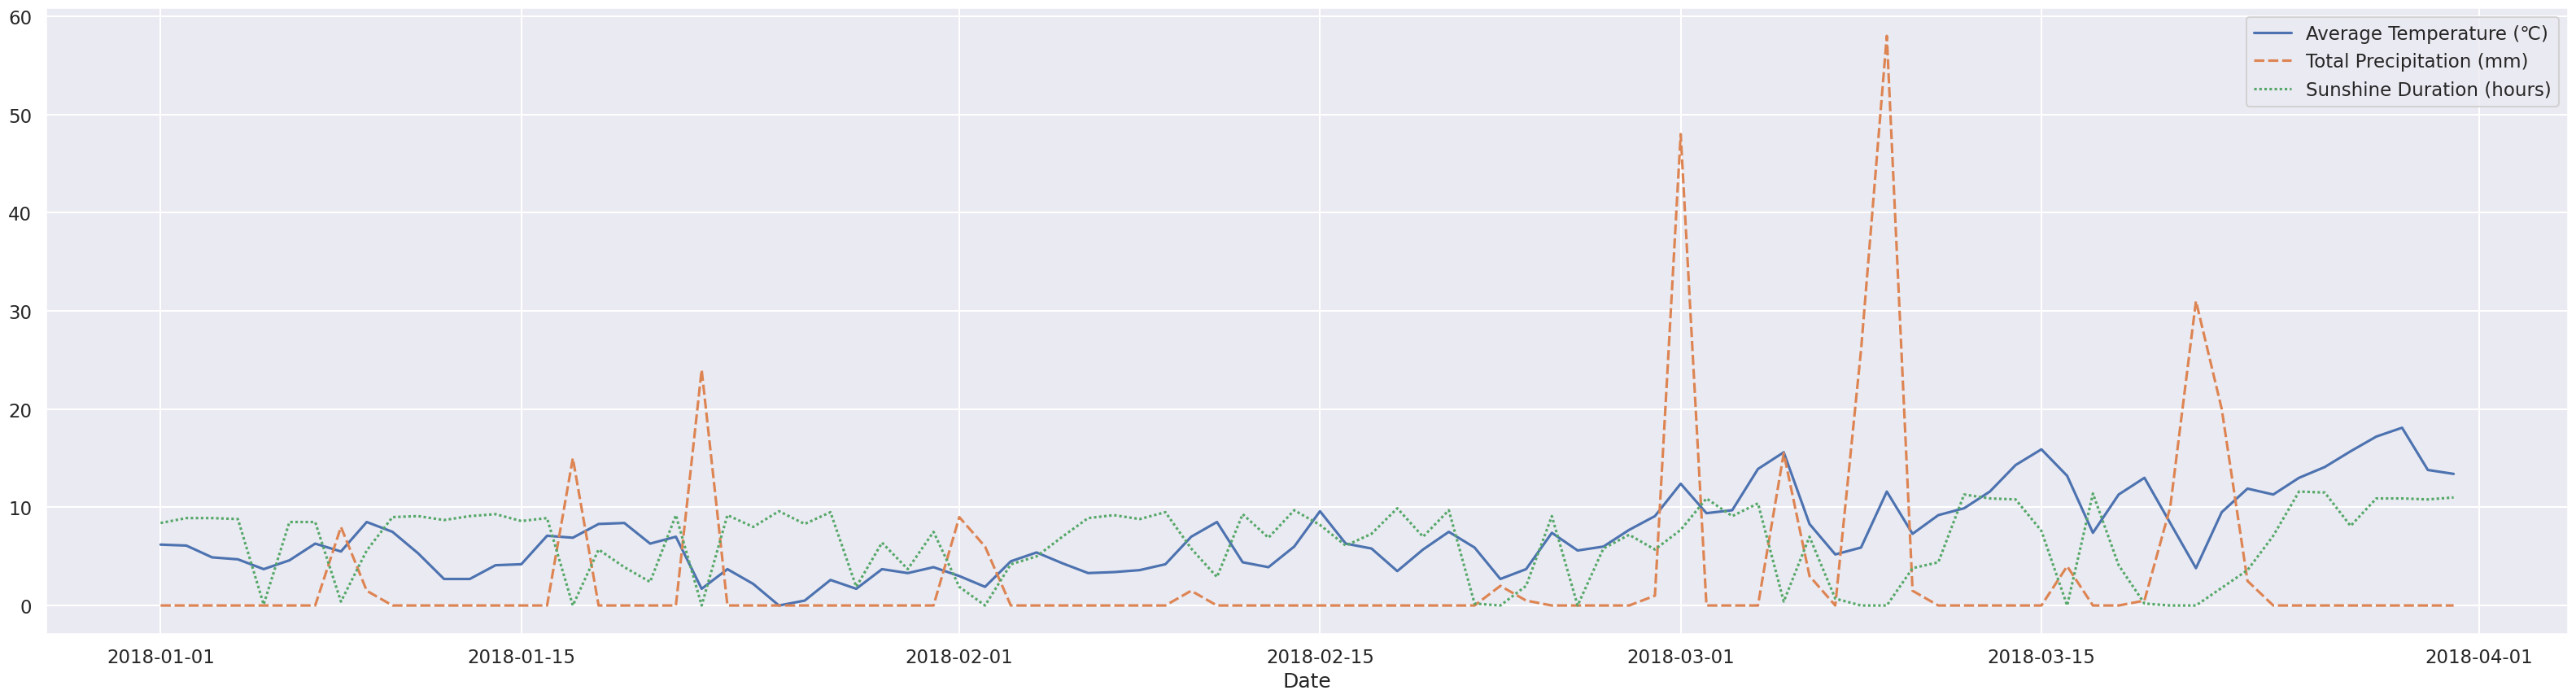

In [9]:
sns.set(context="talk")
fig = plt.subplots(figsize=(40,10))
#["2018-01":"2018-03"]: ほしい期間の設定が可能
sns.lineplot(data=df["2018-01":"2018-03"])

# # 年ごとでも確認できる
# sns.lineplot(data=df.resample("Y").mean())

# # 月ごとでも確認できる
# sns.lineplot(data=df.resample("M").mean())

# # 週ごとでも確認できる
# sns.lineplot(data=df.resample("W").mean())

# # 2ヶ月ごとでも確認できる
# sns.lineplot(data=df.resample("2M").mean())

In [10]:
# ["2018-01"]: 2018-01のデータが抽出される
df["2018-01"]

<ipython-input-10-24985cc44bbd>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2018-01"]


,Average Temperature (℃),Total Precipitation (mm),Sunshine Duration (hours),Day of the Week
Date,,,,
2018-01-01,6.2,0.0,8.4,Monday
2018-01-02,6.1,0.0,8.9,Tuesday
2018-01-03,4.9,0.0,8.9,Wednesday
2018-01-04,4.7,0.0,8.8,Thursday
2018-01-05,3.7,0.0,0.1,Friday
2018-01-06,4.6,0.0,8.5,Saturday
2018-01-07,6.3,0.0,8.5,Sunday
2018-01-08,5.5,8.0,0.4,Monday
2018-01-09,8.5,1.5,5.6,Tuesday
